In [1]:
# Data Preparation & Data Visualizatio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Building Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
## Evaluating Models
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

#### EDA

In [3]:
data = pd.read_csv('E:/python/Kaggle/Data/topSubscribed.csv')
data.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [5]:
data.dtypes

Rank                int64
Youtube Channel    object
Subscribers        object
Video Views        object
Video Count        object
Category           object
Started             int64
dtype: object

In [6]:
data.describe()

,Rank,Started
count,1000.000000,1000.000000
mean,500.500000,2012.594000
std,288.819436,4.110238
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [7]:
data.isnull().sum()

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [8]:
data.shape

(1000, 7)

In [9]:
data.columns

Index(['Rank', 'Youtube Channel', 'Subscribers', 'Video Views', 'Video Count',
       'Category', 'Started'],
      dtype='object')

#### Data Cleaning

In [10]:
data['Video Views'] = data['Video Views'].str.replace(',', '')
data['Subscribers'] = data['Subscribers'].str.replace(',', '')


In [26]:
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.lower()

In [28]:
# from object to number
data['video_views'] = data['video_views'].astype('int64')
data['subscribers'] = data['subscribers'].astype('int64')

In [29]:
data.head(3)

,rank,youtube_channel,subscribers,video_views,video_count,category,started
0,1,T-Series,234000000,212900271553,"18,515",Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rank             1000 non-null   int64 
 1   youtube_channel  1000 non-null   object
 2   subscribers      1000 non-null   int64 
 3   video_views      1000 non-null   int64 
 4   video_count      1000 non-null   object
 5   category         1000 non-null   object
 6   started          1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


#### Data Visualization

In [31]:
data.corr()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32444\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,rank,subscribers,video_views,started
rank,1.000000,-0.645403,-0.450236,0.139624
subscribers,-0.645403,1.000000,0.753648,-0.135162
video_views,-0.450236,0.753648,1.000000,-0.157634
started,0.139624,-0.135162,-0.157634,1.000000


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32444\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

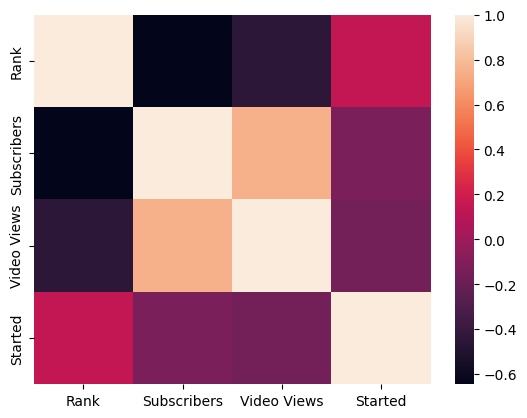

In [15]:
sns.heatmap(data.corr())

In [32]:
data.sort_values(by='subscribers')

,rank,youtube_channel,subscribers,video_views,video_count,category,started
999,1000,Oum Walid,11400000,2480064722,"1,598",People & Blogs,2015
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015
997,998,YtCrash,11400000,3825084,1,Education,2015
980,981,Airrack,11500000,1542774923,159,Entertainment,2015
981,982,Vy Qwaint,11500000,5652341273,559,Howto & Style,2014
...,...,...,...,...,...,...,...
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
3,4,SET India,150000000,137828094104,"103,200",Shows,2006
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015


<AxesSubplot: ylabel='category'>

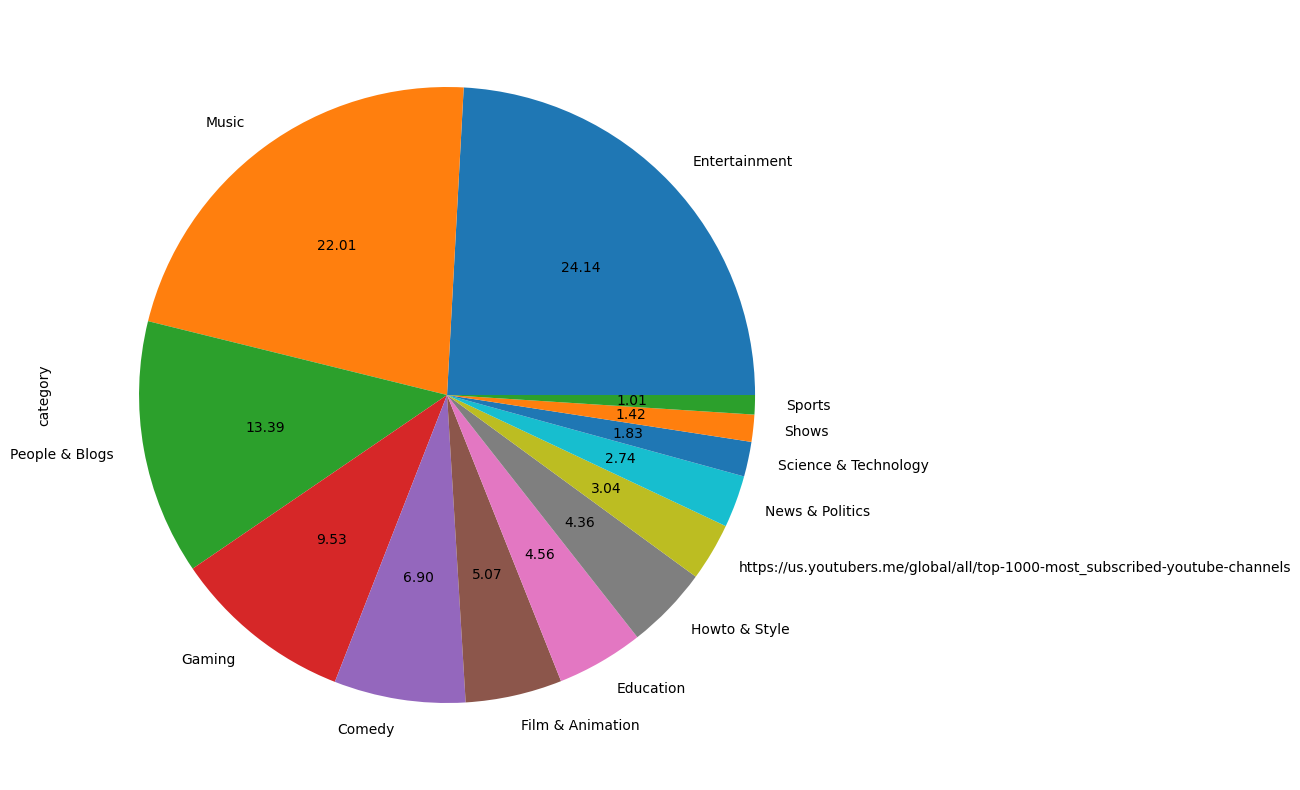

In [33]:
data['category'].value_counts().head(13).plot(kind='pie', figsize=(18, 10), autopct='%1.2f')

<AxesSubplot: xlabel='subscribers', ylabel='video_views'>

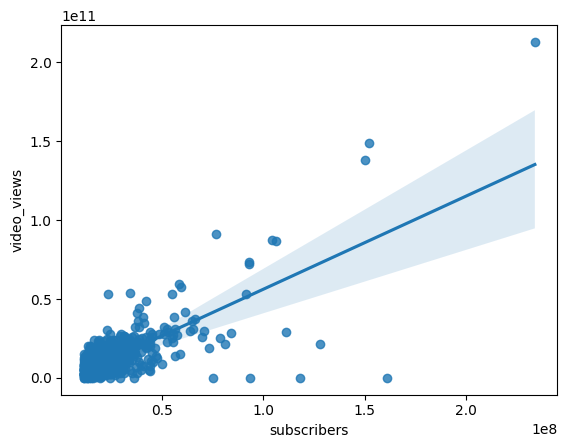

In [34]:
sns.regplot(data=data, x='subscribers', y='video_views')